# Solving LLP using Graphical Method
### Author: Swaroop Srisailam

### Problem
$$
\text{Maximize}\ z= 5x_1+4x_2
$$
subject
$$ 6x_1+4x_2\le 24\\
x_1+2x_2\le6\\
-x_1+x2\le1\\
x_2\le2\\
x_1,x_2\ge0\\
$$

### Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np

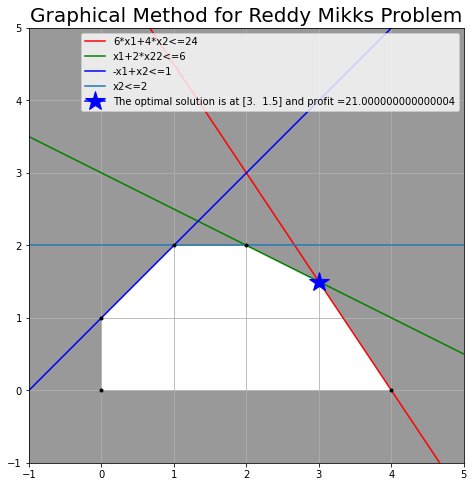

In [28]:
x1=np.linspace(-5,50,100)
x2=np.linspace(-5,50,100)
# objective Function
z= lambda x: 5*x[0]+4*x[1]
#Consriants
c1= lambda x:(24-6*x)/4
c2 =lambda x:(6-x)/2
c3= lambda y:y-1
c4= lambda y:2 +y-y


#plotting the lines
figure=plt.figure(figsize=(10,8))
plt.xlim(-1,5)
plt.ylim(-1,5)

plt.plot(x1,c1(x1),'r',label="6*x1+4*x2<=24")
plt.plot(x1,c2(x1),'g',label="x1+2*x22<=6")
plt.plot(c3(x2),x2,'b',label="-x1+x2<=1")
plt.plot(x1,c4(x1),label="x2<=2")


# To find the intersection points/corner points
p1 = np.array([[6, 4], [1, 2]])
px = np.array([24, 6])
X1 = np.linalg.inv(p1).dot(px)
                                                                   
p2 = np.array([[0, 1], [-1, 1]])
px = np.array([2, 1])
X2 = np.linalg.inv(p2).dot(px)
    

p3 = np.array([[0, 1], [1, 2]])
px = np.array([2, 6])
X3 = np.linalg.inv(p3).dot(px)
  

p4 = np.array([[1, 0], [-1, 1]])
px = np.array([0, 1])
X4 = np.linalg.inv(p4).dot(px)
    

p5 = np.array([[6, 4], [0, 1]])
px = np.array([24, 0])
X5 = np.linalg.inv(p5).dot(px)
 

p6 = np.array([[0, 1], [1, 0]])
px = np.array([0, 0])
X6 = np.linalg.inv(p6).dot(px)
    

p = np.array([X1,X2,X3,X4,X5,X6])
#plotting the  corner points
for i in range(len(p)):
    plt.plot(p[i, 0], p[i, 1], marker='.',color="black")            
                                                      

#shading the feasible region
d = np.linspace(-1,7,1000)
x,y = np.meshgrid(d,d)
plt.imshow(((6*x+4*y<=24) & (x+2*y<=6) & (-x+y<=1) & (y<=2)) & (x>=0) & (y>=0).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower",cmap="gray", alpha = 0.4);


#let us find optimal solution 
sol=0
max=[0,0] # let 0,0 be max
for i in range(len(p)):
    if(z(p[i]) > sol):  #finding max of the equation from points in array p.                                           
        sol=z(p[i])
        max=p[i]
        
#ploting the feasible solution 
plt.plot(max[0],max[1], marker='*',markersize=20,color="b",label=f"The optimal solution is at {max} and profit ={sol}")           
plt.title('Graphical Method for Reddy Mikks Problem',fontsize=20)
plt.grid()
plt.legend()
plt.show()